# Temat: Określenie czy dana osoba zarabia więcej niż 50tyś dolarów rocznie.

Autorzy: Mariusz Rebandel, Jakub Typiński

## 1. Omówienie tematu

Badamy dane dotyczące zarobków w Ameryce w roku 1994. Później się tu coś dopisze.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
adult = pd.read_csv("adult.csv")

## 2. Wstępne przygotowanie danych

In [2]:
#adult['income'] = adult['income'].map(lambda x: {'>50K': 1, '<=50K': 0}[x])

### 2.1 Uzupełnienie i usunięcie pustych danych

Poniżej znajduje się skrypt badający wypełnienie poszczególnych kolumn

Rozmiar: 32561 wierszy.


/home/mariusz/anaconda2/lib/python2.7/site-packages/pandas/core/ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


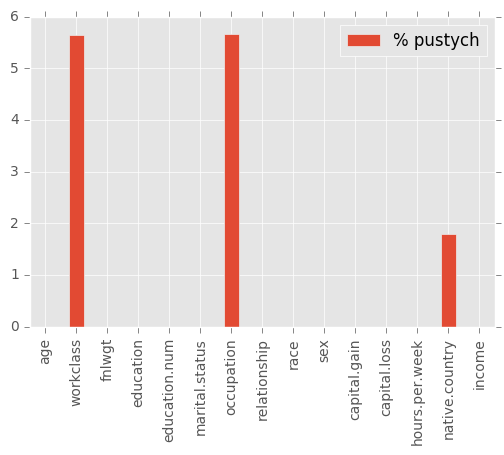

In [3]:
size = len(adult)
print "Rozmiar:", size, "wierszy."
frame = pd.DataFrame(index = adult.columns)
for col in adult.columns:
    empty = 0
    try:
        empty = len(adult.loc[adult[col] == '?'])
    except:
        empty = len(adult.loc[adult[col] == np.NaN])
    percentage = float(empty)*100.0/float(size)
    frame.set_value(col, '% pustych', percentage)
frame.transpose()
frame.plot(kind='bar')

Jak widać, jedynymi kolumnami posiadającymi puste pola są te określające segment rynku, zawód i kraj pochodzenia. Ponadto widać podobną ilość pustych pól w kategoriach segmentu rynku i zatrudnienia, co każe sądzić że są w jakiś sposób ze sobą skorelowane.

In [4]:
dat = [len(adult.loc[adult['workclass'] == '?']), len(adult.loc[adult['occupation'] == '?']),
     len(adult.loc[adult['workclass'] == '?'].loc[adult['occupation'] == '?'])]
ind = ["Segment rynku", "Zawód", "Obydwa"]
pd.DataFrame(index=ind, data=dat, columns=['Nie podano razy'])

,Nie podano razy
Segment rynku,1836
Zawód,1843
Obydwa,1836


Jak widać w każdym wypadku nie podania segmentu rynku badany nie podawał także uprawianego zawodu. Poniżej znajduje się analiza ilości niezatrudnionych osób względem wieku.

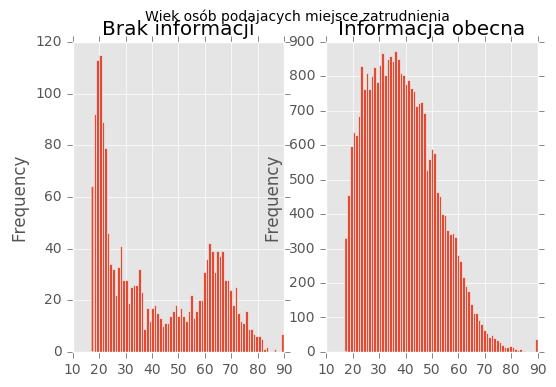

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df1 = adult.loc[adult['workclass'] == '?'].loc[adult['occupation'] == '?'].sort_values(by=['age'])
dfh1 = df1['age'].plot.hist(bins=(90-16), title = 'Brak informacji', ax=ax1)
df2 = adult.loc[adult['workclass'] != '?'].loc[adult['occupation'] != '?'].sort_values(by=['age'])
dfh2 = df2['age'].plot.hist(bins=(90-16), title = 'Informacja obecna', ax=ax2)
fig.suptitle(u"Wiek osób podajacych miejsce zatrudnienia")


Na powyższym wykresie widać duży odsetek osób niezatrudnionych w wieku ok. 20 lat i osób po 60 roku życia. Każe to sądzić, że osoby w wieku 20 lat jeszcze się uczą, natomiast z opracowań statystycznych wynika, że w latach 90. przeciętna wieku przejścia na emeryturę w Ameryce wynosiła 62 lata, zarówno dla kobiet jak i mężczyzn, co potwierdza przypuszczenia, że osoby niepodające zatrudnienia po 60 roku życia to emeryci. Oznacza to, że nie podanie zatrudnienia to brak pracy. Można zauważyć inny rozkład na wykresie z osobami podającymi miejsce zatrudnienia. Dlatego osobom posiadającym znak '?' przypisujemy wartość 'None' oznaczającą aktualny brak zatrudnienia.

In [6]:
adult = adult.drop(adult.loc[adult["occupation"] == '?'].loc[adult["workclass"] != '?'].index)
adult['occupation'] = adult['occupation'].replace(to_replace='?', value='None')
adult['workclass'] = adult['workclass'].replace(to_replace='?', value='None')

Usuwamy wszystkie wiersze, gdzie wprowadzono segment rynku, a nie wprowadzono zawodu. Jest ich znikoma liczba, więc nie wpłynie to znacząco na wyniki badań.

Pozostała kwestia narodowości. Uzupełnione zostaną one najczęściej występującym krajem pochodzenia osób tej samej rasy.

In [7]:
mcc = {}; "Najczęstsze kraje pochodzenia"
for x in adult["race"].unique():
    series = adult.loc[adult["race"] == x]["native.country"]
    counts = series.value_counts()
    mcc[x] = counts.index[0]
    print u"Najczęstszy kraj rasy",x,":",counts.index[0],"(",counts.max(),"/",counts.sum(),")"

Najczęstszy kraj rasy White : United-States ( 25616 / 27811 )
Najczęstszy kraj rasy Black : United-States ( 2830 / 3122 )
Najczęstszy kraj rasy Asian-Pac-Islander : United-States ( 292 / 1039 )
Najczęstszy kraj rasy Other : United-States ( 129 / 271 )
Najczęstszy kraj rasy Amer-Indian-Eskimo : United-States ( 296 / 311 )


In [8]:
for x in mcc.keys():
    adult.loc[(adult["race"] == x) & (adult["native.country"] == "?"), "native.country" ] = mcc[x]

Po zastąpieniu najczęstszymi krajami pochodzenia ludzi różnych ras są:

In [9]:
for x in adult["race"].unique():
    series = adult.loc[adult["race"] == x]["native.country"]
    counts = series.value_counts()
    print u"Najczęstszy kraj rasy",x,":",counts.index[0],"(",counts.max(),"/",counts.sum(),")"

Najczęstszy kraj rasy White : United-States ( 26002 / 27811 )
Najczęstszy kraj rasy Black : United-States ( 2926 / 3122 )
Najczęstszy kraj rasy Asian-Pac-Islander : United-States ( 375 / 1039 )
Najczęstszy kraj rasy Other : United-States ( 147 / 271 )
Najczęstszy kraj rasy Amer-Indian-Eskimo : United-States ( 296 / 311 )


## 2.2 Usunięcie zbędnych kolumn

# 3. Analiza danych

## 3.1 Procentowy skład grup społecznych zarabiających powyżej 50 tysięcy dolarów

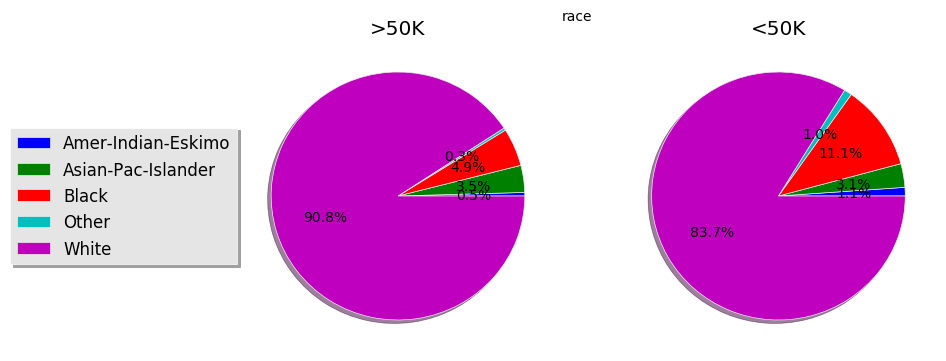

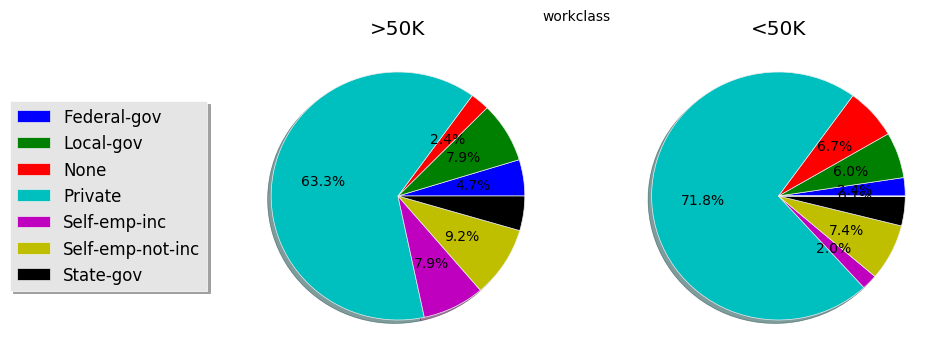

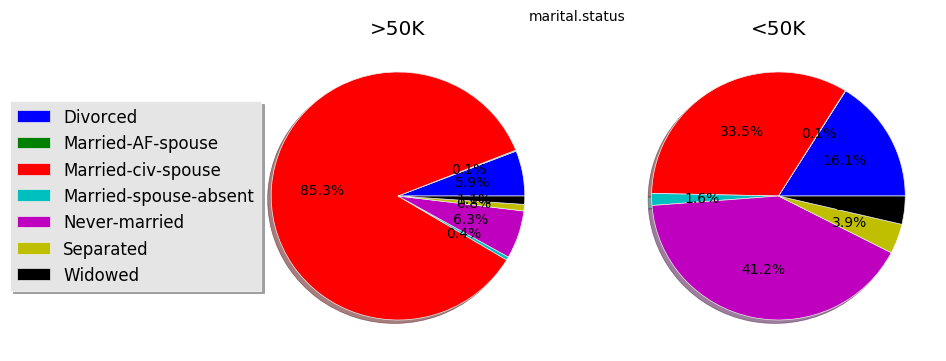

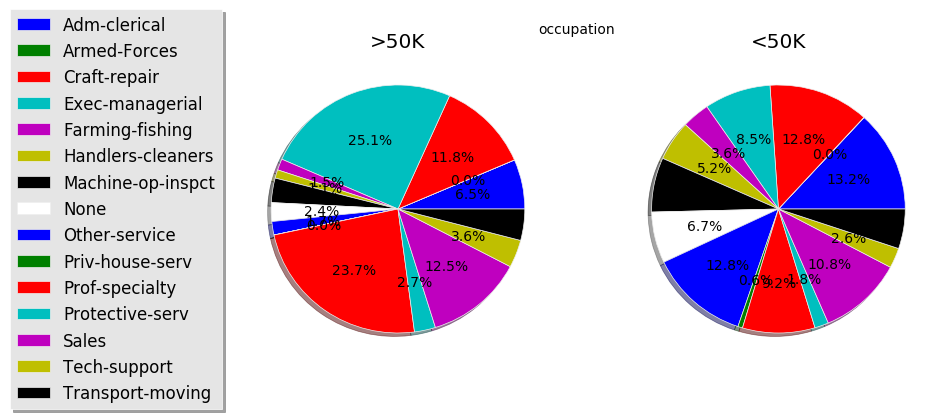

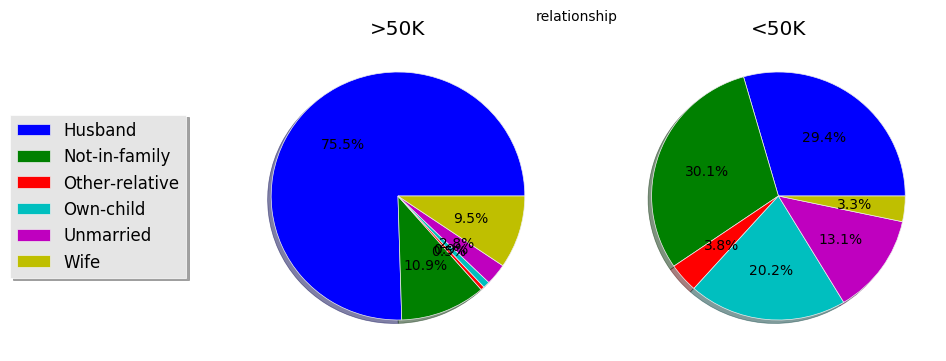

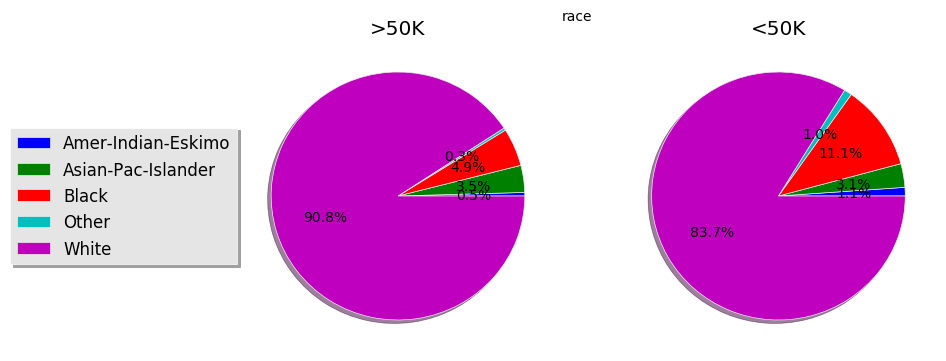

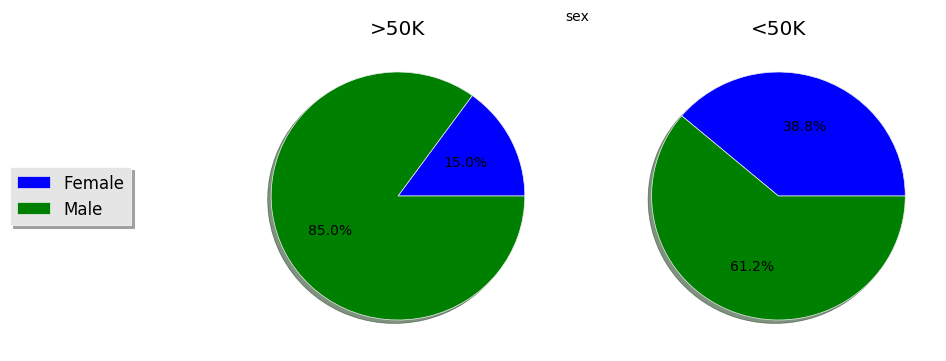

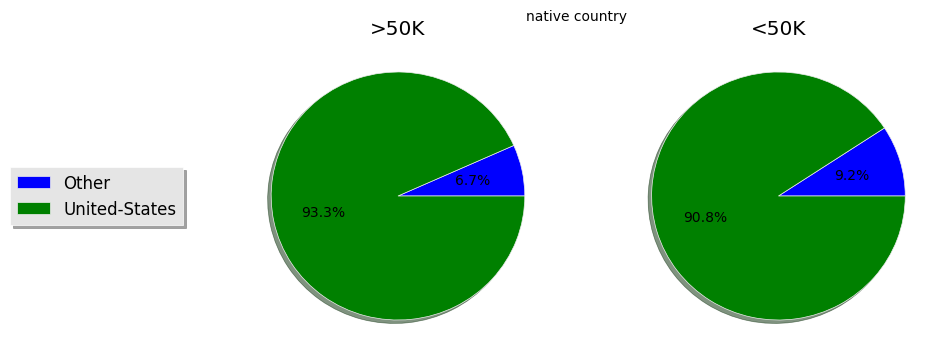

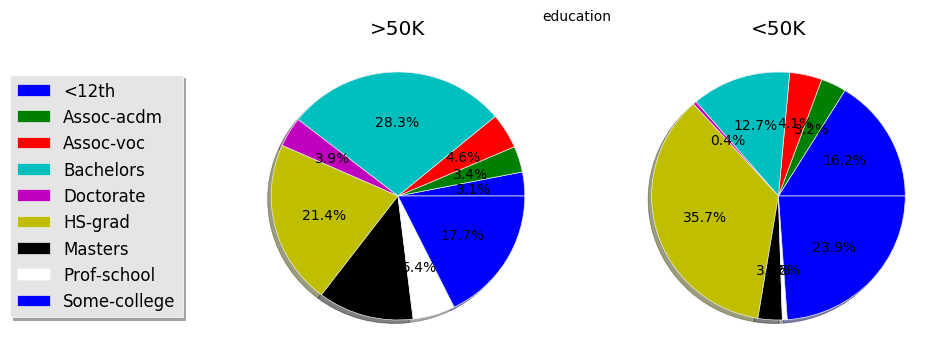

In [28]:
from matplotlib import gridspec

def plotpair(title, series1, series2):
    plt.figure(figsize=(9,4))
    plt.suptitle(title)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    
    series = series1.value_counts()
    series = series.sort_index();
    ax1 = plt.subplot(gs[0])
    labels = [""]*len(series)
    #labels = series.index
    ax1.pie(series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
    labels = series.index
    ax1.legend(loc='center left', shadow=True, bbox_to_anchor=(-0.75, 0.5), labels=labels)
    ax1.xaxis.set_visible(False)
    ax1.set_title(">50K")

    series = series2.value_counts()
    series = series.sort_index();
    ax2 = plt.subplot(gs[1])
    labels = [""]*len(series)
    ax2.pie(series, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
    ax2.set_title("<50K")

    plt.show()

columns = ["race", "workclass", "marital.status", "occupation", "relationship", "race", "sex"]

for x in columns:
    plotpair(x, adult.loc[adult["income"] == ">50K"][x], adult.loc[adult["income"] != ">50K"][x])
    
df1 = adult.copy()
df1.loc[df1["native.country"] != "United-States", "native.country"] = "Other"
plotpair("native country", df1.loc[df1["income"] == ">50K"]["native.country"], df1.loc[df1["income"] != ">50K"]["native.country"])

df1.loc[df1["education.num"] <= 8, "education"] = "<12th"
plotpair("education", df1.loc[df1["income"] == ">50K"]["education"], df1.loc[df1["income"] != ">50K"]["education"])


# 4. Podsumowanie

In [21]:
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [ ]:
[float(x)/2 for x in range(5)]